# Is it a climate disaster?

(last updated: June 29, 2023)

repository: https://github.com/slndaniel/informatievisualisatie/tree/main

# Introduction

In this data story, we explore the complex connections between climate change, El Nino/La Nina occurrences, and greenhouse gas emissions. We seek to identify potential relationships and correlations among these influencing factors using data visualization and analysis from three different angles. We want to obtain deeper understanding of how these variables interact and have an impact on one another by investigating temperature variations, CO2 emissions, methane emissions, and El Nino/La Nina events.

**Perspective 1** <br>
**Greenhouse Gas Emissions do have an influence on global warming:** <br>
CO2 and methane emissions serve as contributing factors to climate change, intensifying its effects and potentially influencing the occurrence of more frequent and severe El-Nino and La-Nina weather events. The rise in greenhouse gas levels, leading to global warming, creates a plausible connection between emissions and these climatic phenomena.

**Perspective 2** <br>
**Greenhouse Gas Emissions do not have an influence on global warming:** <br>
Alternatively, some argue that CO2 and methane emissions have minimal impact on climate change. This perspective challenges the notion that emissions play a significant role in shaping these weather events, suggesting that other factors may be more substantial contributors.

**Perspective 3** <br>
**El-Nino's/La-Nina's causes CO2 levels to rise:** <br>
Conversely, an intriguing perspective highlights the potential influence of El-Nino and La-Nina on CO2 emissions. The hypothesis posits that these weather phenomena could contribute to increased levels of CO2 in the atmosphere. Factors such as weakened trade winds may disrupt the typical release of CO2 from the ocean's depths, leading to an accumulation of carbon dioxide in the sea, lowering the CO2 atmospheric levels.

By examining these different perspectives and their corresponding arguments, we aim to shed light on the intricate interplay between greenhouse gas emissions, El-Nino/La-Nina, and climate change. Through data exploration and visualizations, we hope to unravel the complexities of these relationships and contribute to a better understanding of our changing climate.


# Dataset and preprocessing

For this project we use four datasets. Below you can find the heads of the datasets as well as a description of the set and variables and a link to the download.

Before we used the datasets here, we cleaned them. The code for this can be found in the "Datasets cleaning.ipynb" file in the repository. Now follows an explanation for how we cleaned the datasets.

The first step was to remove all rows with empty values from all datasets, we did this using the .dropna() function. 
Then we renamed the columns for the months in the El-Nino/La-Nina dataset to Jan, Feb, etc. using the .rename() function. The reason for this is because the names to describe the months were confusing and hard to understand (Jan was JJA, Feb was JAS etc.). We also renamed the 'Season' column to 'year' for convenience. The values of the years in this column were formatted like this: 1990-1991, 1991-1992. And so we renamed these so that it just says the left year (so 1990-1991 becomes 1990).
That was everything we did to preprocess the datasets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact
from ipywidgets import IntSlider
from ipywidgets import Dropdown



This dataset is called ‘Temperature change’ and is available for download on Kaggle. This dataset contains information about temperature changes by country for every month, season and year for the years 1961-2019. This dataset can be used to study possible patterns in temperature or impacts of global warming over the years.
Now follows a brief description of the variables in this dataset:

- Area Code: Code of the country.
- Area: Country name.
- Months Code: Code of the month.
- Months: Name of the month. Also contains seasons (3 months) and meteorological year.
- Element Code: Code of the element.
- Element: What element it is, so temperature change or standard deviation.
- Unit: Type of unit for the temperature.
- Y1961-Y2019: These are all the years, and the rows contain the temperature data for that year.


Link to the Temperature change dataset: https://www.kaggle.com/datasets/sevgisarac/temperature-change

In [3]:
temperature_data = pd.read_csv('Temperature_change_cleaned.csv')
temperature_dataframe = pd.DataFrame(temperature_data)
temperature_dataframe.head()


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


This is the temperature dataset, but processed so that the years are rows instead of columns. Also the z-score is calculated and added in a new column.

In [4]:
new_temperature_data = pd.read_csv('new_temperature.csv')
new_temperature_dataframe = pd.DataFrame(new_temperature_data)
new_temperature_dataframe.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature,z-score
0,2,Afghanistan,7001,January,7271,Temperature change,°C,1961,0.777,0.169300
1,2,Afghanistan,7002,February,7271,Temperature change,°C,1961,-1.743,-0.700639
2,2,Afghanistan,7003,March,7271,Temperature change,°C,1961,0.516,0.123397
3,2,Afghanistan,7004,April,7271,Temperature change,°C,1961,-1.709,-1.543048
4,2,Afghanistan,7005,May,7271,Temperature change,°C,1961,1.412,0.541270


This data is called "CO2 Emissions by country" and contains information about the CO2 emission from each country between 1960 till 2019. The Dataset covers each country on this world and is compiled from multiple sources. To know the amount of CO2 emission is very important. This is important because we then get a better understanding, and new policies can be made that ensure that emissions are reduced. Now follows a brief description of the variables in this dataset.

- country_code: Code of the country.
- country_name: Name of the country.
- year: Which year the data is about.
- value: The CO2 emission value in kiloton.

Link to the CO2 Emissions dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country

In [5]:
co2_data = pd.read_csv('CO2_emissions_cleaned.csv')
co2_dataframe = pd.DataFrame(co2_data)
co2_dataframe.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


Here the z score is calculated and added as a new column.

In [6]:
co2_dataframe['Mean'] = co2_dataframe.groupby('country_code')['value'].transform('mean')
co2_dataframe['Std'] = co2_dataframe.groupby('country_code')['value'].transform('std')
co2_dataframe['z-score'] = (co2_dataframe['value'] - co2_dataframe['Mean']) / co2_dataframe['Std']

new_co2_dataframe = co2_dataframe[['country_code', 'country_name', 'year', 'value', 'z-score']]

new_co2_dataframe.to_csv('new_co2.csv', index=False)

new_co2_data = pd.read_csv('new_co2.csv')
new_co2_dataframe = pd.DataFrame(new_co2_data)
new_co2_dataframe.head()

,country_code,country_name,year,value,z-score
0,ABW,Aruba,1960,11092.675,0.769185
1,ABW,Aruba,1961,11576.719,0.850040
2,ABW,Aruba,1962,12713.489,1.039926
3,ABW,Aruba,1963,12178.107,0.950496
4,ABW,Aruba,1964,11840.743,0.894143


This dataset is called "Methane Emissions around the world" and contains the methane(CH4) emissions per year for 195 countries and for a total of 28 years. Methane is the second biggest green house gas after carbon dioxide. This dataset only measures the emissions in the regions of the specified country and doesn’t take into account the possible extra effects of e.g. deforestation, since these effects can take place in another part of the world than where the deforestation has taken place. The values are in metric tons of carbon dioxide equivalent, The unit "MTCO2e" represents an amount of a green house gas whose atmospheric impact has been standardized to that of one unit mass of carbon dioxide. Now follows a brief description of the variables in this dataset.

- Country: Which country the data is about.
- Sector: Which sector the data is about.
- Gas: The type of gas.
- Unit: The type of unit.
- 2018-1990: These are all the years, and the rows contain the methane data for that year.

Link to the Methane emissions dataset: https://www.kaggle.com/datasets/kkhandekar/methane-emissions-across-the-world-19902018

In [7]:
methane_data = pd.read_csv('Methane_emissions_cleaned.csv')
methane_dataframe = pd.DataFrame(methane_data)
methane_dataframe.head()


,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
1,Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
2,India,Total excluding LUCF,CH4,MTCO2e,666.51,661.61,657.69,652.00,653.67,653.53,...,584.49,577.29,567.46,560.74,551.49,543.90,539.00,533.31,528.53,522.74
3,United States,Total excluding LUCF,CH4,MTCO2e,622.59,614.50,609.20,617.17,620.81,618.41,...,688.34,702.98,722.83,738.60,745.84,758.52,751.48,768.67,769.82,766.55
4,Brazil,Total excluding LUCF,CH4,MTCO2e,416.28,421.66,424.80,422.28,416.35,411.88,...,322.94,318.14,311.06,304.62,311.55,311.16,305.47,304.56,300.17,285.24


This cell transforms the methane dataset so that the years are rows instead of columns. Also the z score is calculated and added as a new column.

In [8]:
df_transposed = pd.melt(methane_dataframe, id_vars=['Country'], var_name='Year', value_name='Methane value')
df_transposed.sort_values(['Country', 'Year'], inplace=True)
df_transposed['Year'] = pd.to_numeric(df_transposed['Year'], errors='coerce')
df_transposed = df_transposed.dropna(subset=['Year'])

df_transposed.to_csv('new_methane.csv', index = False)

new_methane_data = pd.read_csv('new_methane.csv')
new_methane_dataframe = pd.DataFrame(new_methane_data)

new_methane_dataframe['Mean'] = new_methane_dataframe.groupby('Country')['Methane value'].transform('mean')
new_methane_dataframe['Std'] = new_methane_dataframe.groupby('Country')['Methane value'].transform('std')
new_methane_dataframe['z-score'] = (new_methane_dataframe['Methane value'] - new_methane_dataframe['Mean']) / new_methane_dataframe['Std']

new_methane_dataframe = new_methane_dataframe[['Country', 'Year', 'Methane value', 'z-score']]

new_methane_dataframe.to_csv('new_methane.csv', index = False)

new_methane_dataframe.head()

,Country,Year,Methane value,z-score
0,Afghanistan,1990.0,8.97,-0.722564
1,Afghanistan,1991.0,9.07,-0.718711
2,Afghanistan,1992.0,8.99,-0.721793
3,Afghanistan,1993.0,8.89,-0.725647
4,Afghanistan,1994.0,8.96,-0.722950


This dataset is called "El-Nino/La-Nina" and contains information about the El Nino and La Nina per season and between the years 1950-2018. El nino and La Nina are natural phenomenons that can cause extreme floods and/or drought. The Datasets main function is to predict the weather of El Nino and La Nina with the LSTM model. Now follows a brief description of the variables in this dataset.

- year: The year of which the data is about.
- Jan-Dec: The months of which the data is about.

Link to the El-Nino/La-Nina dataset: https://www.kaggle.com/datasets/bhaskar100/elnino-lanina

In [9]:
elnino_data = pd.read_csv('ElNino_LaNina_cleaned.csv')
elnino_dataframe = pd.DataFrame(elnino_data)
elnino_dataframe.head()


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [10]:
new_elnino_data = pd.read_csv('ElNino_LaNina_cleaned.csv')
new_elnino_dataframe = pd.DataFrame(new_elnino_data)

max_values = new_elnino_dataframe.iloc[:, 1:].max(axis=1)
min_values = new_elnino_dataframe.iloc[:, 1:].min(axis=1)

values_to_use = np.where(max_values.abs() >= min_values.abs(), max_values, min_values)

mean_value = values_to_use.mean()
std_value = values_to_use.std()

z_scores = (values_to_use - mean_value) / std_value

new_elnino_dataframe['z-score'] = z_scores

new_elnino_dataframe = new_elnino_dataframe[['year', 'z-score']]

new_elnino_dataframe.to_csv('new_elnino_lanina.csv')

new_elnino_dataframe.head()



,year,z-score
0,1950,-0.784710
1,1951,0.904352
2,1952,0.566540
3,1953,0.566540
4,1954,-0.869164


# Greenhouse Gas Emissions do have an influence on global warming

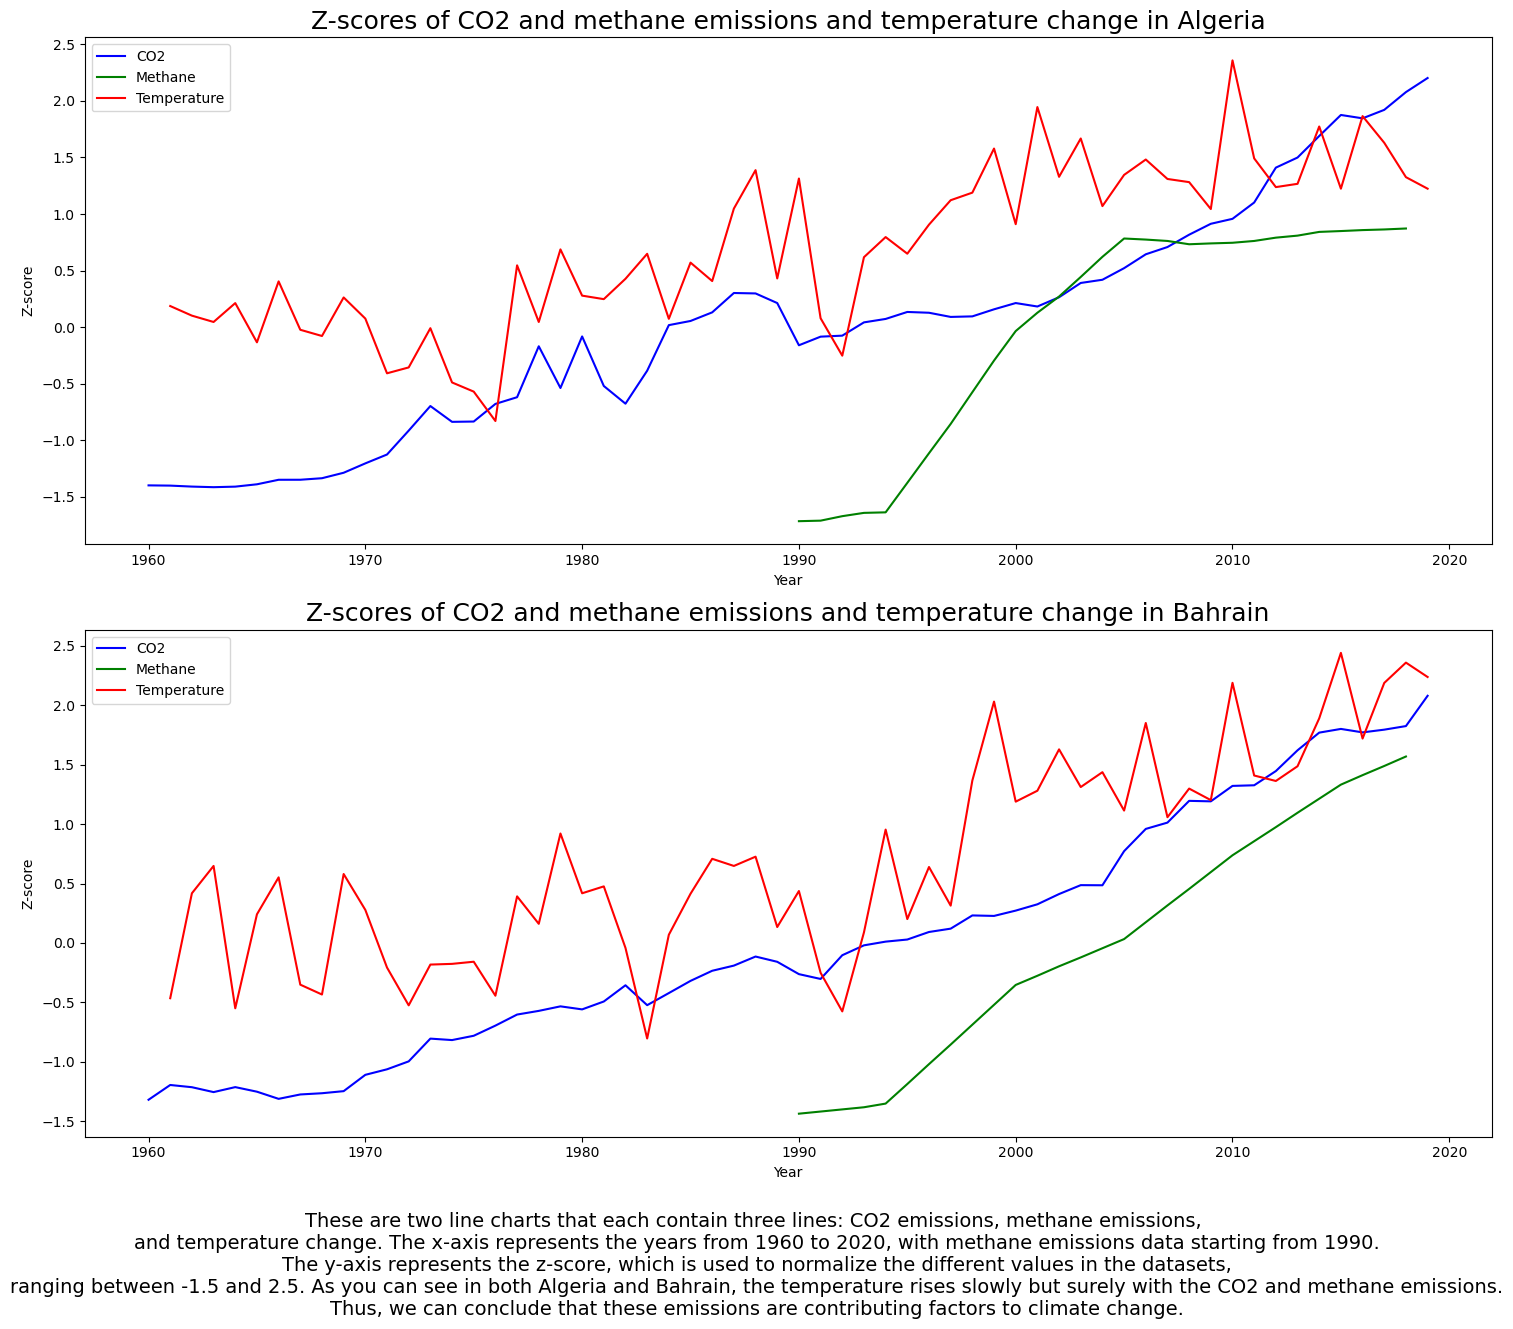

In [11]:
# Chris

fig, (chart1, chart2) = plt.subplots(2, 1, figsize=(15, 12))

# Algeria
co2_algeria = new_co2_dataframe[
    (new_co2_dataframe['country_name'] == 'Algeria') &
    (new_co2_dataframe['year'].between(1960, 2023))
]

methane_algeria = new_methane_dataframe[
    (new_methane_dataframe['Country'] == 'Algeria') &
    (new_methane_dataframe['Year'].between(1960, 2023))
]

temperature_algeria = new_temperature_dataframe[
    (new_temperature_dataframe['Area'] == 'Algeria') &
    (new_temperature_dataframe['Year'].between(1960, 2023)) &
    (new_temperature_dataframe['Months'] == 'Meteorological year')
]

chart1.plot(co2_algeria['year'], co2_algeria['z-score'], label='CO2', color='blue')
chart1.plot(methane_algeria['Year'], methane_algeria['z-score'], label='Methane', color='green')
chart1.plot(temperature_algeria['Year'], temperature_algeria['Temperature'], label='Temperature', color='red')

chart1.set_xlabel('Year')
chart1.set_ylabel('Z-score')
chart1.set_title('Z-scores of CO2 and methane emissions and temperature change in Algeria', fontsize=18)
chart1.legend()

# Bahrain
co2_bahrain = new_co2_dataframe[
    (new_co2_dataframe['country_name'] == 'Bahrain') &
    (new_co2_dataframe['year'].between(1960, 2023))
]

methane_bahrain = new_methane_dataframe[
    (new_methane_dataframe['Country'] == 'Bahrain') &
    (new_methane_dataframe['Year'].between(1960, 2023))
]

temperature_bahrain = new_temperature_dataframe[
    (new_temperature_dataframe['Area'] == 'Bahrain') &
    (new_temperature_dataframe['Year'].between(1960, 2023)) &
    (new_temperature_dataframe['Months'] == 'Meteorological year')
]

chart2.plot(co2_bahrain['year'], co2_bahrain['z-score'], label='CO2', color='blue')
chart2.plot(methane_bahrain['Year'], methane_bahrain['z-score'], label='Methane', color='green')
chart2.plot(temperature_bahrain['Year'], temperature_bahrain['Temperature'], label='Temperature', color='red')

chart2.set_xlabel('Year')
chart2.set_ylabel('Z-score')
chart2.set_title('Z-scores of CO2 and methane emissions and temperature change in Bahrain', fontsize=18)
chart2.legend()

captiontext = '''These are two line charts that each contain three lines: CO2 emissions, methane emissions, 
and temperature change. The x-axis represents the years from 1960 to 2020, with methane emissions data starting from 1990.
The y-axis represents the z-score, which is used to normalize the different values in the datasets,
ranging between -1.5 and 2.5. As you can see in both Algeria and Bahrain, the temperature rises slowly but surely with the CO2 and methane emissions.
Thus, we can conclude that these emissions are contributing factors to climate change.'''

fig.text(0.5, -0.1, captiontext, horizontalalignment='center', fontsize=14)

plt.tight_layout()
plt.show()

In [12]:
# Daniel

# China
co2_china = new_co2_dataframe[
    (new_co2_dataframe['country_name'] == 'China') &
    (new_co2_dataframe['year'].between(1960, 2023))
]

methane_china = new_methane_dataframe[
    (new_methane_dataframe['Country'] == 'China') &
    (new_methane_dataframe['Year'].between(1960, 2023))
]

temperature_china = new_temperature_dataframe[
    (new_temperature_dataframe['Area'] == 'China') &
    (new_temperature_dataframe['Year'].between(1960, 2023)) &
    (new_temperature_dataframe['Months'] == 'Meteorological year')
]

trace = go.Scatter(
    x=co2_china['z-score'],
    y=methane_china['z-score'],
    mode='markers',
    marker=dict(
        size=abs(temperature_china['Temperature']) * 10,
        sizemode='diameter',
        sizeref=0.1,
        color=temperature_china['Temperature'],
        colorscale='Viridis',
        showscale=True,
        cmin=temperature_china['Temperature'].min(),
        cmax=temperature_china['Temperature'].max()
    ),
    text=co2_china['z-score'],
    hovertemplate=
    '<b>CO2: %{x}</b><br>'+
    '<b>Methane: %{y}</b><br>'+
    '<b>Temperature Z-Score: %{marker.size}</b><br>',
)

layout = go.Layout(
    title='CO2, Methane, and Temperature Z-Scores in China',
    xaxis=dict(title='CO2'),
    yaxis=dict(title='Methane'),
    hovermode='closest',
    margin=dict(
        l=100,
        r=80,
        t=100,
        b=130 
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    annotations=[
        dict(
            text='Caption: Bubble chart showing the relationship between CO2 and Methane z-scores in China, <br>'+ 
            'with the size of the dots representing the intensity of the Temperature Z-Scores. <br>'+
            'The blue dots represent a higher temperature than the purple dots, <br>'+
            'indicating a relationship between higher temperatures and rising CO2 and methane levels.',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.42,
            showarrow=False,
            font=dict(
                size=12,
                color='black'
            )
        )
    ],
    height=500, 
    width=780  
)


fig.show()

# Greenhouse Gas Emissions do not have an influence on global warming

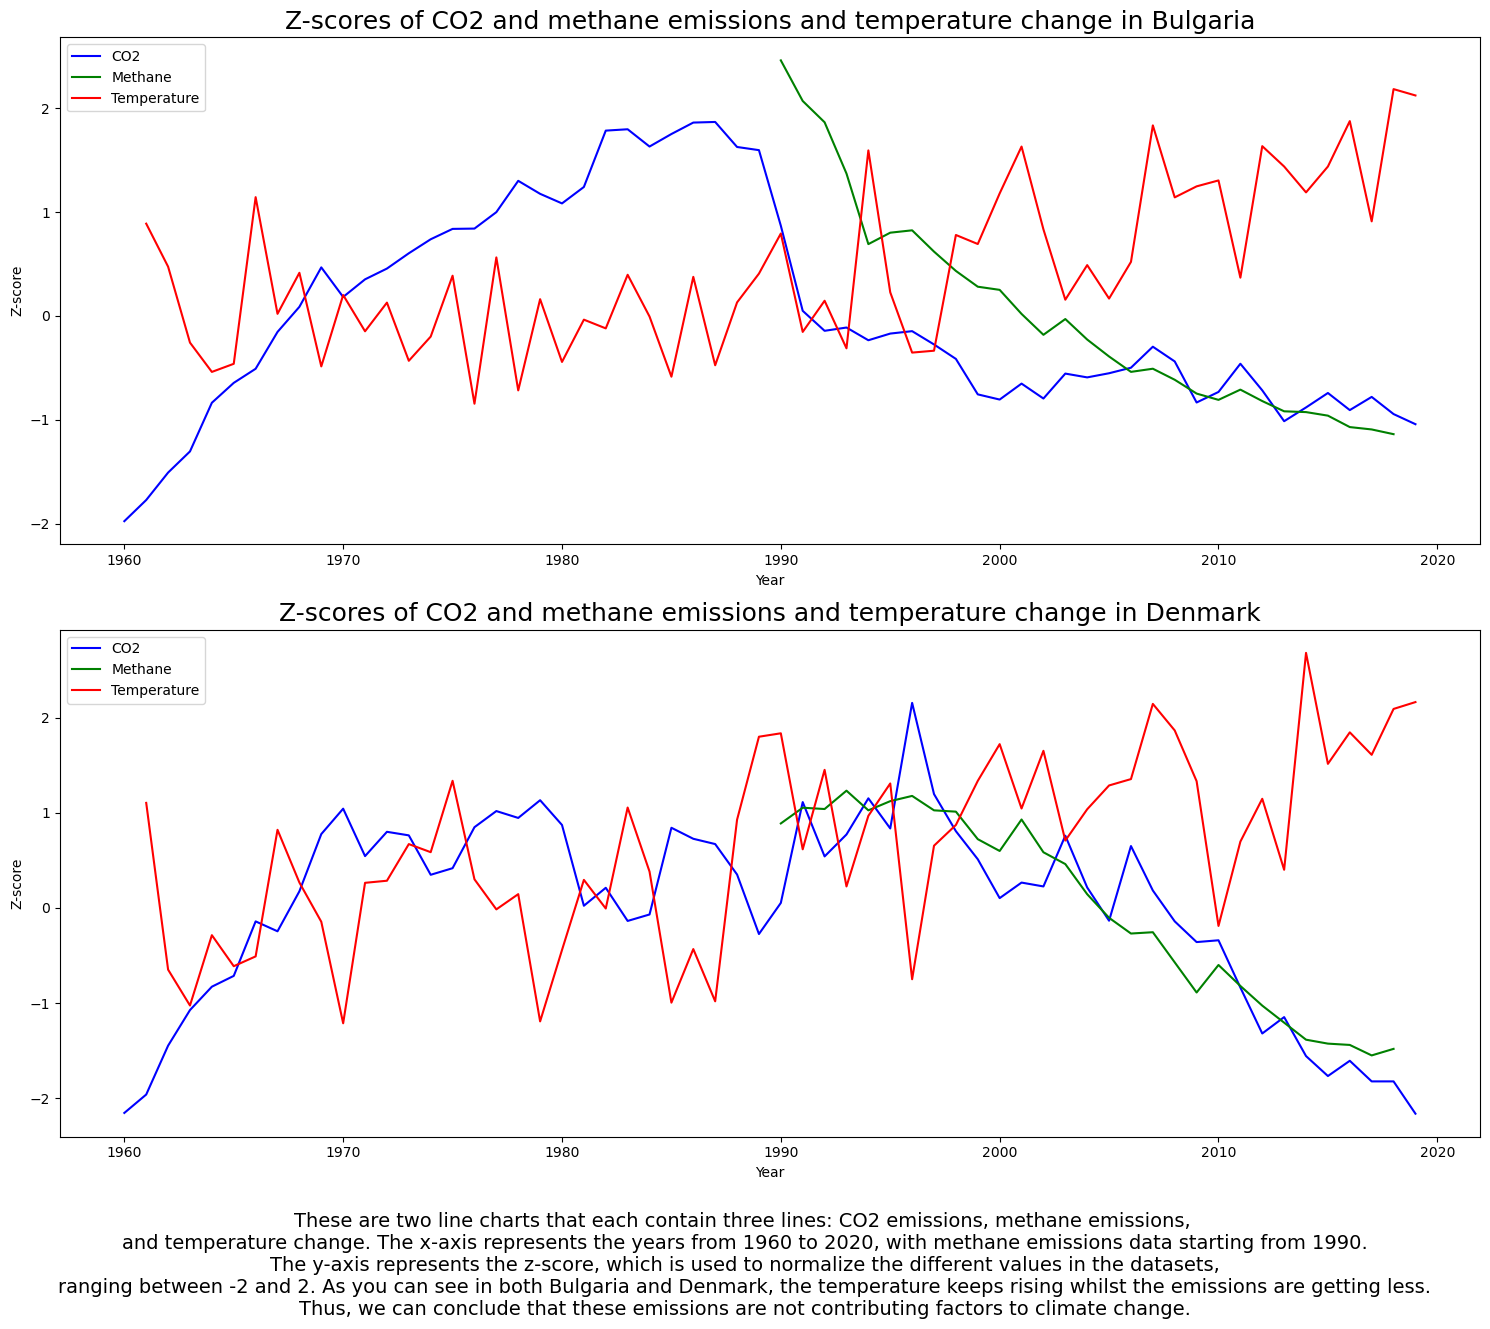

In [13]:
# Chris

fig, (chart1, chart2) = plt.subplots(2, 1, figsize=(15, 12))

# Bulgaria
co2_bulgaria = new_co2_dataframe[
    (new_co2_dataframe['country_name'] == 'Bulgaria') &
    (new_co2_dataframe['year'].between(1960, 2023))
]

methane_bulgaria = new_methane_dataframe[
    (new_methane_dataframe['Country'] == 'Bulgaria') &
    (new_methane_dataframe['Year'].between(1960, 2023))
]

temperature_bulgaria = new_temperature_dataframe[
    (new_temperature_dataframe['Area'] == 'Bulgaria') &
    (new_temperature_dataframe['Year'].between(1960, 2023)) &
    (new_temperature_dataframe['Months'] == 'Meteorological year')
]

chart1.plot(co2_bulgaria['year'], co2_bulgaria['z-score'], label='CO2', color='blue')
chart1.plot(methane_bulgaria['Year'], methane_bulgaria['z-score'], label='Methane', color='green')
chart1.plot(temperature_bulgaria['Year'], temperature_bulgaria['Temperature'], label='Temperature', color='red')

chart1.set_xlabel('Year')
chart1.set_ylabel('Z-score')
chart1.set_title('Z-scores of CO2 and methane emissions and temperature change in Bulgaria', fontsize=18)
chart1.legend()

# Denmark
co2_denmark = new_co2_dataframe[
    (new_co2_dataframe['country_name'] == 'Denmark') &
    (new_co2_dataframe['year'].between(1960, 2023))
]

methane_denmark = new_methane_dataframe[
    (new_methane_dataframe['Country'] == 'Denmark') &
    (new_methane_dataframe['Year'].between(1960, 2023))
]

temperature_denmark = new_temperature_dataframe[
    (new_temperature_dataframe['Area'] == 'Denmark') &
    (new_temperature_dataframe['Year'].between(1960, 2023)) &
    (new_temperature_dataframe['Months'] == 'Meteorological year')
]

chart2.plot(co2_denmark['year'], co2_denmark['z-score'], label='CO2', color='blue')
chart2.plot(methane_denmark['Year'], methane_denmark['z-score'], label='Methane', color='green')
chart2.plot(temperature_denmark['Year'], temperature_denmark['Temperature'], label='Temperature', color='red')

chart2.set_xlabel('Year')
chart2.set_ylabel('Z-score')
chart2.set_title('Z-scores of CO2 and methane emissions and temperature change in Denmark', fontsize=18)
chart2.legend()

captiontext = '''These are two line charts that each contain three lines: CO2 emissions, methane emissions, 
and temperature change. The x-axis represents the years from 1960 to 2020, with methane emissions data starting from 1990.
The y-axis represents the z-score, which is used to normalize the different values in the datasets,
ranging between -2 and 2. As you can see in both Bulgaria and Denmark, the temperature keeps rising whilst the emissions are getting less.
Thus, we can conclude that these emissions are not contributing factors to climate change.'''

fig.text(0.5, -0.1, captiontext, horizontalalignment='center', fontsize=14)

plt.tight_layout()
plt.show()


In [14]:
# Daniel

# Afghanistan
co2_afghanistan = new_co2_dataframe[
    (new_co2_dataframe['country_name'] == 'Afghanistan') &
    (new_co2_dataframe['year'].between(1960, 2023))
]

methane_afghanistan = new_methane_dataframe[
    (new_methane_dataframe['Country'] == 'Afghanistan') &
    (new_methane_dataframe['Year'].between(1960, 2023))
]

temperature_afghanistan = new_temperature_dataframe[
    (new_temperature_dataframe['Area'] == 'Afghanistan') &
    (new_temperature_dataframe['Year'].between(1960, 2023)) &
    (new_temperature_dataframe['Months'] == 'Meteorological year')
]

trace = go.Scatter(
    x=co2_afghanistan['z-score'],
    y=methane_afghanistan['z-score'],
    mode='markers',
    marker=dict(
        size=abs(temperature_afghanistan['Temperature']) * 7,
        sizemode='diameter',
        sizeref=0.1,
        color=temperature_afghanistan['Temperature'],
        colorscale='Viridis',
        showscale=True,
        cmin=temperature_afghanistan['Temperature'].min(),
        cmax=temperature_afghanistan['Temperature'].max()
    ),
    text=co2_afghanistan['z-score'],
    hovertemplate=
    '<b>CO2: %{x}</b><br>'+
    '<b>Methane: %{y}</b><br>'+
    '<b>Temperature Z-Score: %{marker.size}</b><br>',
)

layout = go.Layout(
    title='CO2, Methane, and Temperature Z-Scores in Afghanistan',
    xaxis=dict(title='CO2'),
    yaxis=dict(title='Methane'),
    hovermode='closest',
     margin=dict(
        l=100,
        r=80,
        t=100,
        b=130 
    )
)

fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    annotations=[
        dict(
            text='Caption: Bubble chart showing the relationship between CO2 and Methane z-scores in Afghanistan, <br>'+
            'with the size of the dots representing the intensity of the Temperature Z-Scores.  <br>'+
            'The green dots represent a higher temperature than the purple dots, <br>'+
            'you can see big green dots in the lower left and upper right corners, <br>'+
            'indicating that there is no relationship between higher temperatures and rising CO2 and methane levels.',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.46,
            showarrow=False,
            font=dict(
                size=12,
                color='black'
            )
        )
    ],
    height=500, 
    width=780 
)

fig.show()

# El-Nino's and La-Nina's causes CO2 levels to rise

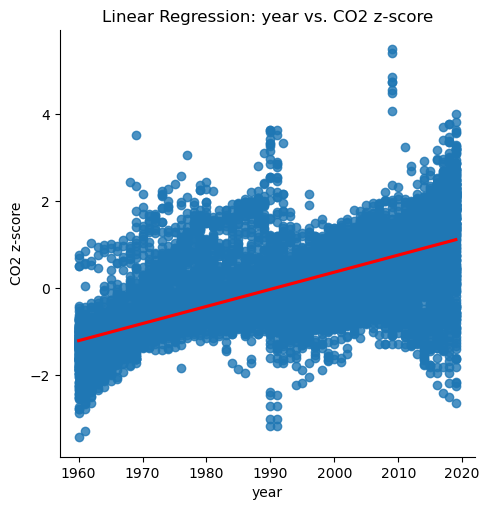

In [15]:
# Daniel

CO2_elnino_df = pd.read_csv('CO2_merge_elnino_lanina.csv')

only_elnino = CO2_elnino_df[CO2_elnino_df['z-score_y'] >= 0.5]

z_score_x = CO2_elnino_df['z-score_x']
z_score_y = CO2_elnino_df['z-score_y']

sns.lmplot(data=CO2_elnino_df, x='year', y='z-score_x', line_kws={'color': 'red'})
plt.xlabel('year')
plt.ylabel('CO2 z-score')
plt.title('Linear Regression: year vs. CO2 z-score')
plt.show()

In the next three maps you can see the CO2-levels under three different conditions, 
El Nino, La Nina and Neither El Nino/La Nina. 


In [26]:
data_all_values = pd.read_csv('all_data_and_long_lat.csv')
data_all_values_df = pd.DataFrame(data_all_values)
data_all_values_df = data_all_values_df[np.isfinite(data_all_values_df['z-score-methane'])]
data_all_values_df['z-score-elnino-lanina'] = data_all_values_df['z-score-elnino-lanina'] + 3

bins = [-np.inf, 2.5, 3.5, np.inf]
shapes = ['circle', 'square', 'triangle-up']
data_all_values_df['marker'] = pd.cut(data_all_values_df['z-score-elnino-lanina'], bins=bins, labels=shapes)

data_all_values_df = data_all_values_df[data_all_values_df['z-score-elnino-lanina'] >= 3.5]

fig = px.scatter_geo(data_all_values_df,
                     lat='latitude',
                     lon='longitude',
                     color='z-score-co2',
                     color_continuous_scale='RdBu',
                     size='z-score-elnino-lanina',
                     size_max=15,
                     animation_frame='Year',
                     title='Relation between CO2 and El Nino | 1990-2018',
                     labels={'latitude': 'Latitude', 'longitude': 'Longitude'},
                     custom_data=['marker'])

fig.update_geos(
    resolution=50,
    showland=True, landcolor="gray",
    showocean=True, oceancolor="LightBlue",
    showcountries=True, countrycolor="black"
)

for frame in fig.frames:
    frame['data'][0]['marker']['symbol'] = data_all_values_df[data_all_values_df['Year'] == int(frame['name'])]['marker']

fig.update_layout(legend_title_text='Legend')
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='circle', color='black'), name='La Nina', showlegend=True))
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='square', color='black'), name='Neither', showlegend=True))
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='triangle-up', color='black'), name='El Nino', showlegend=True))

fig.update_layout(width=780, height=650, showlegend=True)

fig.data[0].marker.symbol = 'triangle-up'

fig.add_annotation(
    text='Firstly, we have the relation between CO2 and El Nino, you will clearly see an pattern<br>'+
    'in this first map. For instance, the years 1991, 1996, 1997, 2009, 2014, 2015 and 2018<br>'+
    'have a strong tendency to a very high or very low CO2-level. This can indicate a strong relation<br>'+
    'between El Nino occurences and highly fluctuating CO2-levels up and down',
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0,
    y=-0.1,
    bordercolor='black',
    borderwidth=1
)


fig.show()


In [33]:
data_all_values = pd.read_csv('all_data_and_long_lat.csv')
data_all_values_df = pd.DataFrame(data_all_values)
data_all_values_df = data_all_values_df[np.isfinite(data_all_values_df['z-score-methane'])]
data_all_values_df['z-score-elnino-lanina'] = data_all_values_df['z-score-elnino-lanina'] + 3

bins = [-np.inf, 2.5, 3.5, np.inf]
shapes = ['circle', 'square', 'triangle-up']
data_all_values_df['marker'] = pd.cut(data_all_values_df['z-score-elnino-lanina'], bins=bins, labels=shapes)

data_all_values_df = data_all_values_df[data_all_values_df['z-score-elnino-lanina'] <= 2.5]

fig = px.scatter_geo(data_all_values_df,
                     lat='latitude',
                     lon='longitude',
                     color='z-score-co2',
                     color_continuous_scale='RdBu',
                     size='z-score-elnino-lanina',
                     size_max=13,
                     animation_frame='Year',
                     title='Relation between CO2 and La Nina | 1990-2018',
                     labels={'latitude': 'Latitude', 'longitude': 'Longitude'},
                     custom_data=['marker'])

fig.update_geos(
    resolution=50,
    showland=True, landcolor="gray",
    showocean=True, oceancolor="LightBlue",
    showcountries=True, countrycolor="black"
)

for frame in fig.frames:
    frame['data'][0]['marker']['symbol'] = data_all_values_df[data_all_values_df['Year'] == int(frame['name'])]['marker']

fig.update_layout(legend_title_text='Legend')
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='circle', color='black'), name='La Nina', showlegend=True))
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='square', color='black'), name='Neither', showlegend=True))
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='triangle-up', color='black'), name='El Nino', showlegend=True))

fig.update_layout(width=780, height=650, showlegend=True)

fig.data[0].marker.symbol = 'circle'

fig.add_annotation(
    text='Secondly, we have the relation between CO2 and La Nina, there are no strong tendencies here.<br>'+
    'The years 2016 and 2017 have a high degree of CO2-levels all around the globe.<br>'+
    'In the same span of 2014-2018 we could also see these high levels of CO2<br>'+
    'during El Nino activities, eliminating the existence of a correlation between higher CO2-levels<br>'+
    'and the La Nina events. In addition, we can not conclude there is a relation between<br>'+
    'lower CO2-levels and the La Nina, because there is no significant influence',
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0,
    y=-0.12,
    bordercolor='black',
    borderwidth=1
)

fig.show()


In [18]:
data_all_values = pd.read_csv('all_data_and_long_lat.csv')
data_all_values_df = pd.DataFrame(data_all_values)
data_all_values_df = data_all_values_df[np.isfinite(data_all_values_df['z-score-methane'])]
data_all_values_df['z-score-elnino-lanina'] = data_all_values_df['z-score-elnino-lanina'] + 3

bins = [-np.inf, 2.5, 3.5, np.inf]
shapes = ['circle', 'square', 'triangle-up']
data_all_values_df['marker'] = pd.cut(data_all_values_df['z-score-elnino-lanina'], bins=bins, labels=shapes)

data_all_values_df = data_all_values_df[data_all_values_df['z-score-elnino-lanina'] < 3.5]
data_all_values_df = data_all_values_df[data_all_values_df['z-score-elnino-lanina'] > 2.5]

fig = px.scatter_geo(data_all_values_df,
                     lat='latitude',
                     lon='longitude',
                     color='z-score-co2',
                     color_continuous_scale='RdBu',
                     size='z-score-elnino-lanina',
                     size_max=10,
                     animation_frame='Year',
                     title='Relation between CO2 and normal conditions (Neither El Nino/La Nina) | 1990-2018',
                     labels={'latitude': 'Latitude', 'longitude': 'Longitude'},
                     custom_data=['marker'])

fig.update_geos(
    resolution=50,
    showland=True, landcolor="gray",
    showocean=True, oceancolor="LightBlue",
    showcountries=True, countrycolor="black"
)

for frame in fig.frames:
    frame['data'][0]['marker']['symbol'] = data_all_values_df[data_all_values_df['Year'] == int(frame['name'])]['marker']

fig.update_layout(legend_title_text='Legend')
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='circle', color='black'), name='La Nina', showlegend=True))
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='square', color='black'), name='Neither', showlegend=True))
fig.add_trace(go.Scattergeo(mode='markers', marker=dict(symbol='triangle-up', color='black'), name='El Nino', showlegend=True))

fig.update_layout(width=780, height=650, showlegend=True)

fig.data[0].marker.symbol = 'square'

fig.show()
